# Prosper Loan Data - Visualization
## by (Mahdi Valipour)

## Preliminary Wrangling

The Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset
df_original = pd.read_csv("prosperLoanData.csv")
# Keep original dataset and get a copy for data preprocessing 
df = df_original.copy()
# glimpse of dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# structure of dataset, number of rows and columns
df.shape

(113937, 81)

In [4]:
# Review features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Drop missing rows
df.dropna(subset=["EmploymentStatusDuration", "CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines",
                  "TotalCreditLinespast7years"], inplace=True)

## Univariate Exploration

### 1- Number of listings of states

##### Question-1: Which states have the highest and lowest number of listings?
##### Question-2: Is there any relationship between the population of the state and the number of listings?

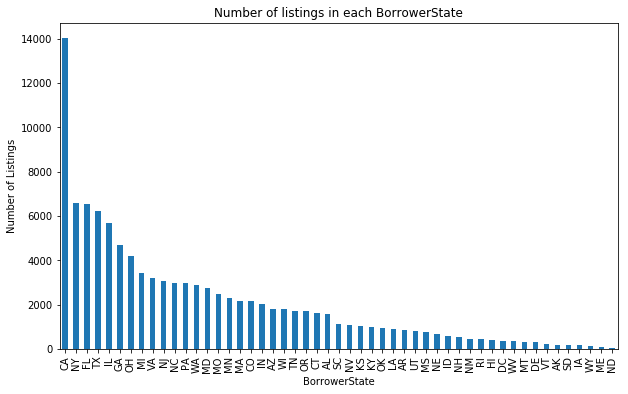

In [6]:
# count of each state in the data
states_count = df.BorrowerState.value_counts()

# plots the bar graph
color = sb.color_palette()[0]

plt.figure(figsize=(10, 6))
states_count.plot(kind='bar', color=color);

plt.title('Number of listings in each BorrowerState');
plt.xlabel('BorrowerState');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);


A indicated the highest listings are in CA, TX, NY, FL and IL, which are top US states by population and the least are in WY, ME, ND. In other words, the Prosper listings are distributed according to the population of the US.

### 2-Number of listings for each LoanStatus available

##### Question-1: How is the current loaning process?
##### Question-2: How many loans are in process and already completed?

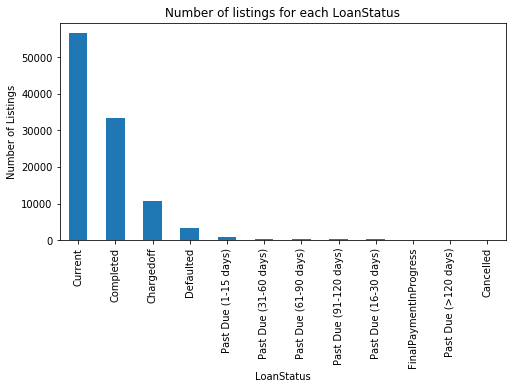

In [7]:
# count of each status type available
status_count = df.LoanStatus.value_counts()

# plots the bar graph for loan statuses
plt.figure(figsize=(8, 4))
status_count.plot(kind='bar', color=color);

plt.title('Number of listings for each LoanStatus');
plt.xlabel('LoanStatus');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

The number of listings in each LoanStatus type are analyzed and the plot shows that Current status has got the highest number of listings followed by Completed and Chargedoff. Other statuses include dues for various intervals and cancelled which had very small number of listings.

### 3- Income rate distribution

##### Question-1: What income braket has the highest number of listings?
##### Question-2: which income class does most of the proper's clients belong to?

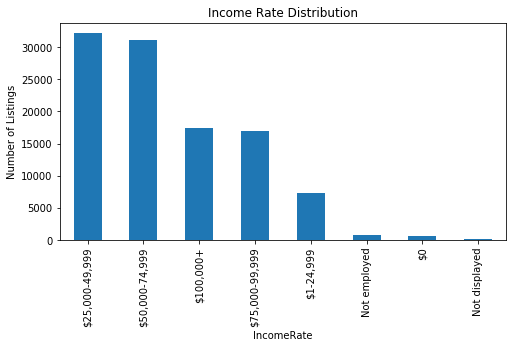

In [8]:
# count of listings under each income range
income_range_count = df.IncomeRange.value_counts()

# plots the bar graph for each income range specified
plt.figure(figsize=(8, 4))
income_range_count.plot(kind='bar', color=color);

plt.title('Income Rate Distribution');
plt.xlabel('IncomeRate');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);


The income rate distribution is analyzed to know the average income rate of listings. The plot says that most listings fall under $50000, followed by $50000-74999. This also concludes that the more the income rate the less the numbe of the listings.

### 4-Loan original amount

##### Question: What is the range of most registered loans? 

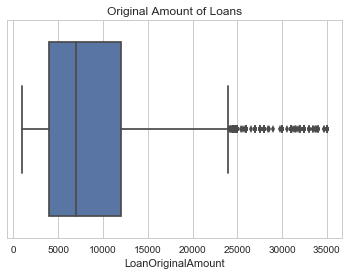

In [9]:
sb.set(style="whitegrid")
ax = sb.boxplot(x=df["LoanOriginalAmount"])
plt.title('Original Amount of Loans');

This boxplot shows that most loans are of size between 4000 and 12000 (lower and upper quartiles respectively). Also shown is the oulier points which are determined as the values above 1.5*interquartile range (IQR). These outlier values represent a group of loans which are unusual in their quantity and are much higher than the average amount.

## Bivariate Exploration

### 1-BorrowerRate pattern over years

##### Question: what is the variation of interest rate over years?

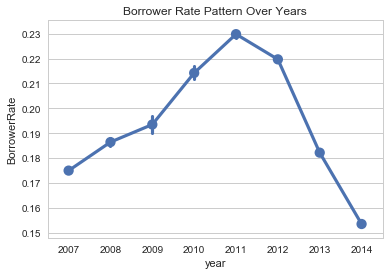

In [10]:
# Create a column named 'year' using creationg date

df['year'] = df.ListingCreationDate.str.split('-').str[0]

sb.pointplot(data=df, x='year', y='BorrowerRate');
plt.title('Borrower Rate Pattern Over Years');

Results show that the rate of interest increased from 2005-2006 and then fell off from 2006-2007 and then it constantly picked up for few years, reached its peak in 2011 which then started decreasing constantly.

### 2-Income range vs ProsperPrincipalBorrowed

##### Question: Is there any relationship between people's income and the amount of request loans?

In [11]:
df.IncomeRange.value_counts()

$25,000-49,999    32177
$50,000-74,999    31043
$100,000+         17333
$75,000-99,999    16914
$1-24,999          7265
Not employed        802
$0                  618
Not displayed       138
Name: IncomeRange, dtype: int64

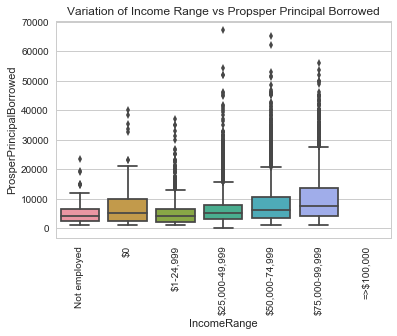

In [12]:
# adjust order for x_axis 
x_axis_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '=>$100,000']

# boxplot
sb.boxplot(data=df, x='IncomeRange', y='ProsperPrincipalBorrowed', order=x_axis_order);
plt.xticks(rotation=90);
plt.title('Variation of Income Range vs Propsper Principal Borrowed');

As shown, the medians are in increasing order, indicating the more the income range the more the principal amount borrowed from the Prosper except for the not employed or 0 dollar salaried.

### 3- AvailableBankcardCredit vs. BorrowerRate

##### Question: Would more available bank credit help to lower interest rate?

Text(0.5,1,'Variation of AvailableBankcardCredit vs. BorrowerRate')

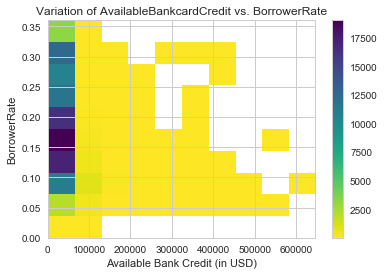

In [13]:
# remove the null entries
data11 = df.loc[df.AvailableBankcardCredit.notnull()]

# plots the hist2d graph 
plt.hist2d(data=data11, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('Variation of AvailableBankcardCredit vs. BorrowerRate')

the plot inidicated that the more depsotie in the bank account, the less the loans they take and less the borrower rate in most cases.

## Multivariate Exploration

### 1-Correlation Matrix Plot of selected features

##### How is the relationship (correlation) among the selected featrues?
'LoanMonthsSinceOrigination', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ProsperScore', 'BorrowerRate'

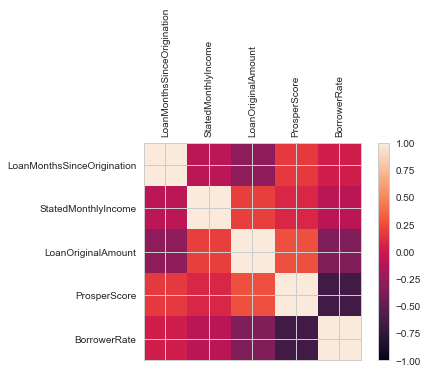

In [14]:
# Correction Matrix Plot
data = df[['LoanMonthsSinceOrigination', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ProsperScore', 'BorrowerRate']]
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ['LoanMonthsSinceOrigination', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ProsperScore', 'BorrowerRate']
ax.set_xticklabels(names)
plt.xticks(rotation=90)
ax.set_yticklabels(names)
plt.show()

Exploration of the quantitative variables showed that Borrower Rate, in relation to the other variables, is correlating best with Prosper Score. This correlation value is approximately -0.65 which indicate a negative moderate correlation. From general point of view it can be said that one variable is determined by the other. Such relation, in light of the correlation value, might be also affected by other variable/s.

### 2-Homeowner vs non-homeowner rate over time

##### Question: How would owning/not-owning a home influence the interest rate?

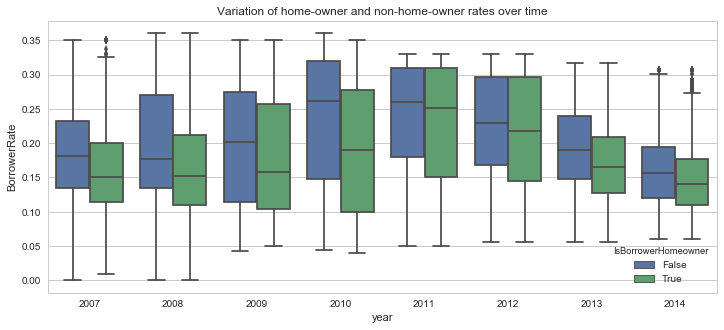

In [15]:
Plot1 = sb.boxplot(data=df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
Plot1.figure.set_figwidth(12)
Plot1.figure.set_figheight(5)
plt.title('Variation of home-owner and non-home-owner rates over time');

To exhibit the multivariate analysis, one particular scenario is taken i.e., analysing how the rate of interest changed over years for Homeowners vs Non-Homeowners and to depict this scenario, a boxplot is used because it can be easily analyzed with the advantage of having only two cases in the hue column. This boxplot shows that the borrower rate increased for some years in case of non homeowners, however it constantly decreased around 2010. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph went up till 2011 and started falling off from then.

### Summary

1- First step taken was to get a general idea about the data ans its structure.
2- Select the appropriate features to better answer targeted question.
3- Cleaning the selected features for proper investigation.
4- Using different types of exploration technique to get insight about data and answer the question. The exploration is divided into 3 analytical segments in increasing order of complexity: Univariate Plots, Bivariate Plots, and Multivariate plots.
5- Listing main findings about the selected dataset, as below:
    - Prosper loan listings are distributed according to the population of the US.
    - Most loan borrowers have annual income braket of $50000.
    - Most loans are of size between $4000 and $12000. 
    - Interest rate increased constantly after 2008 recession up to 2011.
    - Homeowners have paid lower interest rates compared to non-homeowners.